# Powerplay vs Total Score Patterns

The T20 format thrives on its fast-paced, high-scoring nature. A crucial element in this equation is the Powerplay, a designated period at the beginning of each innings that grants the batting team a significant advantage. Here's a breakdown of the Powerplay and its impact on the game:

The Powerplay Explained:

Duration: The first six overs of each innings are designated as the Powerplay.
Fielding Restrictions: During this period, the fielding team can only have a maximum of two fielders positioned outside the 30-yard circle (excluding the wicketkeeper). This creates larger gaps in the field, making it more challenging for bowlers to restrict runs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/merged_data.csv')
data.describe()

C:\Users\kaush\AppData\Local\Temp\ipykernel_32936\1034898893.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/selected_data/merged_data.csv')


,Unnamed: 0,runs_by_bat,extra_runs,total_runs_delivery,current_team_total,runs_remain,batter_runs,balls_faced,wickets_fallen,delivery,over,innings,year,month,final_team_total
count,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217117.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000
mean,58.990656,1.224077,0.070336,1.294414,73.723217,88.342751,16.977679,13.807915,2.679233,3.624690,9.062437,1.476740,2016.900839,6.480731,153.933991
std,35.160852,1.600601,0.348809,1.588189,48.397965,55.651093,17.765433,11.830359,2.213450,1.816367,5.655411,0.503005,5.015507,3.585855,34.386642
min,0.000000,0.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2005.000000,1.000000,1.000000
25%,29.000000,0.000000,0.000000,0.000000,34.000000,48.000000,4.000000,5.000000,1.000000,2.000000,4.000000,1.000000,2013.000000,3.000000,132.000000
50%,58.000000,1.000000,0.000000,1.000000,69.000000,89.000000,11.000000,10.000000,2.000000,4.000000,9.000000,1.000000,2018.000000,7.000000,153.000000
75%,89.000000,1.000000,0.000000,1.000000,108.000000,129.000000,25.000000,20.000000,4.000000,5.000000,14.000000,2.000000,2021.000000,10.000000,176.000000
max,136.000000,7.000000,5.000000,8.000000,278.000000,276.000000,172.000000,77.000000,11.000000,12.000000,19.000000,6.000000,2024.000000,12.000000,278.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217242 entries, 0 to 217241
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           217242 non-null  int64  
 1   batter               217242 non-null  object 
 2   bowler               217242 non-null  object 
 3   non_striker          217242 non-null  object 
 4   runs_by_bat          217242 non-null  int64  
 5   extra_runs           217242 non-null  int64  
 6   total_runs_delivery  217242 non-null  int64  
 7   current_team_total   217242 non-null  int64  
 8   runs_remain          217117 non-null  float64
 9   batter_runs          217242 non-null  int64  
 10  balls_faced          217242 non-null  int64  
 11  wickets_fallen       217242 non-null  int64  
 12  delivery             217242 non-null  int64  
 13  over                 217242 non-null  int64  
 14  extra_type           217242 non-null  object 
 15  wicket_type      

In [4]:
# Only keep the columns we need
columns_needed = ['current_team_total', 'final_team_total', 'over', 'delivery', 'wickets_fallen', 'match_id', 'innings', 'year']
powerplay_data = data[columns_needed]
powerplay_data.head()



# problem - we need to get the current score at the end of the powerplay
# i.e that is the end last delivery of the 5th over. which is not always the 6th delivery of the 5th over
# select the highest delivery number of the 5th over for each match_id and innings

gp = powerplay_data[powerplay_data['over']  == 5].groupby(['match_id', 'innings',])
powerplay_data = gp.apply(lambda x: x[x['delivery'] == x['delivery'].max()])

# Now we have the data we need
# we don't need the grouping anymore
powerplay_data = powerplay_data.reset_index(drop=True)

# Drop the over and delivery columns
powerplay_data = powerplay_data.drop(['over', 'delivery'], axis=1)

# change the current_team_total column to powerplay_score
powerplay_data = powerplay_data.rename(columns={'current_team_total': 'powerplay_score'})

# Data is ready for analysis
powerplay_data.head()

,powerplay_score,final_team_total,wickets_fallen,match_id,innings,year
0,44,167,0,Afghanistan_Bangladesh_2018-06-03,1,2018
1,49,122,2,Afghanistan_Bangladesh_2018-06-03,2,2018
2,43,145,0,Afghanistan_Bangladesh_2018-06-07,1,2018
3,35,144,3,Afghanistan_Bangladesh_2018-06-07,2,2018
4,40,154,3,Afghanistan_Bangladesh_2023-07-14,1,2023


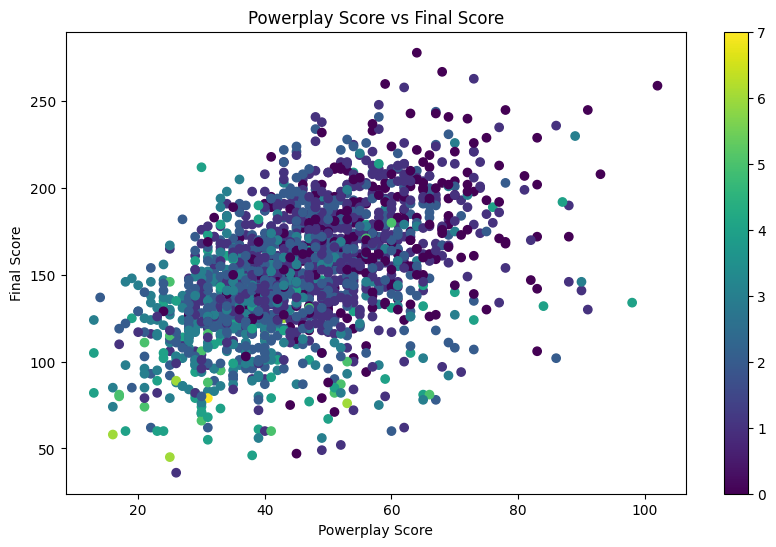

In [5]:
# hypotheis - the powerplay score and wickets fallen has an effect on the final score
# i.e the higher the powerplay score and loweer the wickets fallen, the higher the final score

# Let's plot the data
plt.figure(figsize=(10, 6))
plt.scatter(powerplay_data['powerplay_score'], powerplay_data['final_team_total'], c=powerplay_data['wickets_fallen'], cmap='viridis')
plt.xlabel('Powerplay Score')
plt.ylabel('Final Score')
plt.title('Powerplay Score vs Final Score')
plt.colorbar()
plt.show()


As noticed there is a significant linear correlation between the powerplay score. This might be due to the fact that final score already contains what ever scored during the powerplay

In [6]:
# check the correlation between the variables using the pearson correlation without the match_id, innnings and year columns
powerplay_data[['powerplay_score', 'final_team_total', 'wickets_fallen']].corr(method='pearson')

,powerplay_score,final_team_total,wickets_fallen
powerplay_score,1.000000,0.487275,-0.373059
final_team_total,0.487275,1.000000,-0.377090
wickets_fallen,-0.373059,-0.377090,1.000000


Feature Addition: Penalizing Runs when a wicket falls
- new feature = score - wickets * run rate

                            score - run_rate * wickets  final_team_total
score - run_rate * wickets                    1.000000          0.515422
final_team_total                              0.515422          1.000000


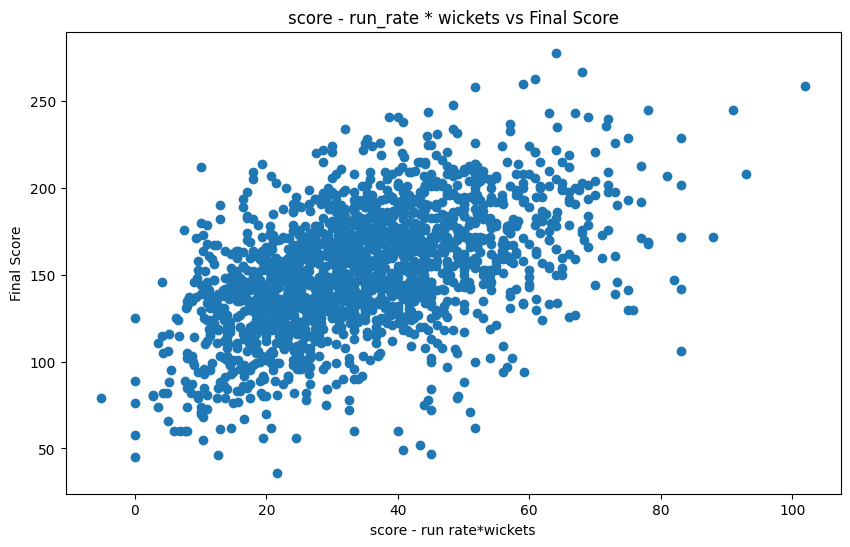

In [7]:
# The correlation between the powerplay score and the final score is 0.447
# The correlation between the wickets fallen and the final score is -0.347



# create a new feature - run rate
powerplay_data['run_rate'] = powerplay_data['powerplay_score'] / 6

# create a new feature - powerplay score per wicket fallen
powerplay_data['score - run_rate * wickets'] = powerplay_data['powerplay_score']  - powerplay_data['wickets_fallen'] * powerplay_data['run_rate'] 

# check the correlation between the variables using the pearson correlation without the match_id, innnings and year columns
print(powerplay_data[['score - run_rate * wickets', 'final_team_total']].corr(method='pearson'))

# plot the data
plt.figure(figsize=(10, 6))
plt.scatter(powerplay_data['score - run_rate * wickets'], powerplay_data['final_team_total'])
plt.xlabel('score - run rate*wickets')
plt.ylabel('Final Score')
plt.title('score - run_rate * wickets vs Final Score')
plt.show()

# Removing the powerplay score from the final score

In [1]:
# obviously higher powerplay score should be associated with higher final score
# hence let's take a new variable "score from 6-20"

powerplay_data["6-20 Overs Score"] = powerplay_data["final_team_total"] - powerplay_data["powerplay_score"]

#plot 6-20 overs score vs powerplay score as scatter plot add the number of wickets as color
plt.figure(figsize=(10, 6))
plt.scatter(powerplay_data['powerplay_score'], powerplay_data['6-20 Overs Score'], c=powerplay_data['wickets_fallen'], cmap='viridis')
plt.xlabel('Poweplay Score')
plt.ylabel('Score from 6-20 Overs')
plt.title('Powerplay score vs rest of the innings score')
plt.colorbar()
plt.show()

# check the correlation between the variables using the pearson correlation without the match_id, innnings and year columns
print(powerplay_data[['powerplay_score', '6-20 Overs Score']].corr(method='pearson'))
# The correlation between the powerplay score and the 6-20 overs score is 0.13

# plot 6 - 20 over score vs number of wickets as error bars use grouping by wickets fallen
gp = powerplay_data.groupby('wickets_fallen')
wickets_fallen_means = gp['6-20 Overs Score'].mean()
wickets_fallen_std = gp['6-20 Overs Score'].std()

plt.figure(figsize=(10, 6))
plt.plot(wickets_fallen_means.index, wickets_fallen_means, '-o')
plt.fill_between(wickets_fallen_means.index, wickets_fallen_means - wickets_fallen_std, wickets_fallen_means + wickets_fallen_std, alpha=0.2)
plt.xlabel('Wickets Fallen in the powerplay')
plt.ylabel('Score from 6-20 Overs')
plt.title('Score from 6-20 Overs vs Wickets Fallen in the powerplay')
plt.show()


# check correlation between wickets fallen and 6-20 overs score
print(powerplay_data[['wickets_fallen', '6-20 Overs Score']].corr(method='pearson'))

# The correlation between the wickets fallen and the 6-20 overs score is -0.27


# check the correlation between the variables using the pearson correlation without the match_id, innnings
print(powerplay_data[['powerplay_score', 'final_team_total', 'wickets_fallen', 'run_rate', 'score - run_rate * wickets', '6-20 Overs Score', 'innings']].corr(method='pearson'))


NameError: name 'powerplay_data' is not defined

Although not linear, there seems to be a negative correlation between wickets falilng in the powerplay and the runs scored in the remainder of the match. This is the usual intuition in cricket, wickets in hand -> higher totals

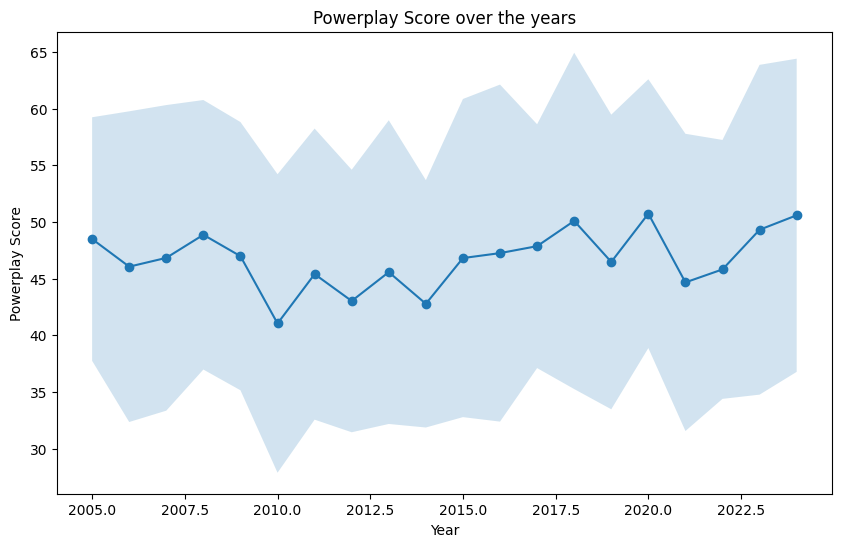

In [34]:
# checking the progression of powerplay score over the years
gp = powerplay_data.groupby('year')
powerplay_data_year = gp['powerplay_score'].mean()

# year is an integer, so plot discrete data
plt.figure(figsize=(10, 6))
plt.plot(powerplay_data_year.index, powerplay_data_year.values, marker='o')
# fill between to show the standard deviation
plt.fill_between(powerplay_data_year.index, powerplay_data_year.values - gp['powerplay_score'].std(), powerplay_data_year.values + gp['powerplay_score'].std(), alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Powerplay Score')
plt.title('Powerplay Score over the years')
plt.show()

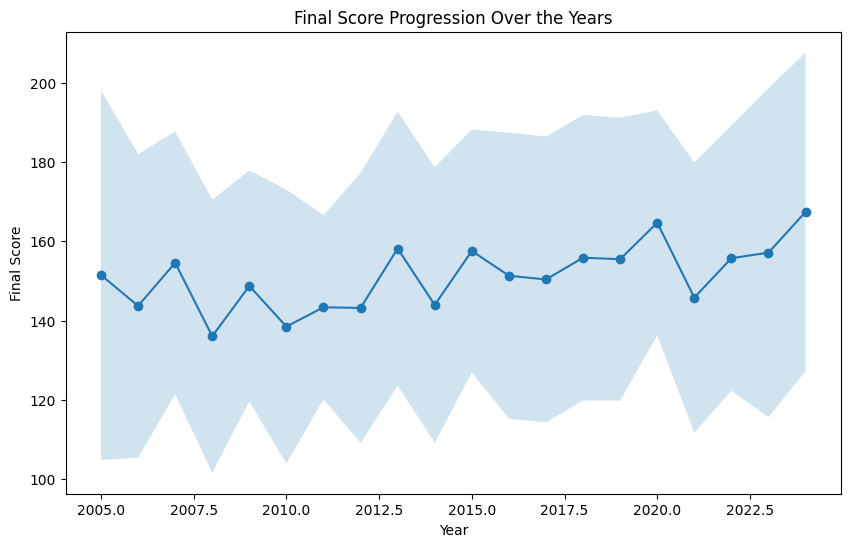

In [35]:
# final score progression over the years as line plot
gp = powerplay_data.groupby('year')
final_score_year = gp['final_team_total'].mean()

plt.figure(figsize=(10, 6))
plt.plot(final_score_year.index, final_score_year.values, marker='o')
# fill between to show the standard deviation
plt.fill_between(final_score_year.index, final_score_year.values - gp['final_team_total'].std(), final_score_year.values + gp['final_team_total'].std(), alpha=0.2)

plt.xlabel('Year')
plt.ylabel('Final Score')
plt.title('Final Score Progression Over the Years')
plt.show()





Although the common myth in T20 cricket has been that the final score has increased significantly, above graph shows that it is not exactly the case. It might depend on other factors, for example if a world cup happens in that year then most of the data will be skewed towards the final score in specific venues. Venue data will be analyzed later 

<Figure size 1000x600 with 0 Axes>

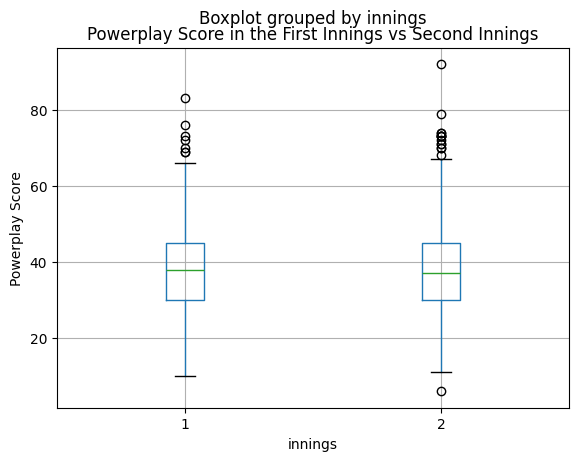

In [ ]:
# Powerplay score in the first innings vs the second innings in a boxplot
plt.figure(figsize=(10, 6))
powerplay_data.boxplot(column='powerplay_score', by='innings')
plt.ylabel('Powerplay Score')
plt.title('Powerplay Score in the First Innings vs Second Innings')
plt.show()



<Figure size 1000x600 with 0 Axes>

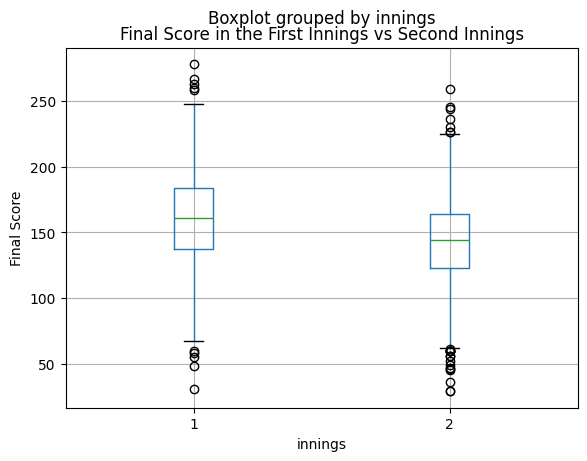

In [ ]:
# final score in the first innings vs the second innings in a boxplot
plt.figure(figsize=(10, 6))
powerplay_data.boxplot(column='final_team_total', by='innings')
plt.ylabel('Final Score')
plt.title('Final Score in the First Innings vs Second Innings')
plt.show()

# should be less in the second innings

In [ ]:
# from original data, select the venue with the highest number of matches
gp = data.groupby('venue')
venue_data = gp['match_id'].count()
venue_data = venue_data.sort_values(ascending=False)
venue_data.head()

venue
Dubai International Cricket Stadium      9992
Harare Sports Club                       9887
Shere Bangla National Stadium            6873
Shere Bangla National Stadium, Mirpur    5940
R Premadasa Stadium                      5526
Name: match_id, dtype: int64

In [ ]:
def getPowerPlayData(venue, data):
	# Get the data for the venue
	data = data[data['venue'] == venue]

	# Only keep the columns we need
	columns_needed = ['current_team_total', 'final_team_total', 'over', 'delivery', 'wickets_fallen', 'match_id', 'innings', 'year']
	powerplay_data = data[columns_needed]
	powerplay_data.head()



	# problem - we need to get the current score at the end of the powerplay
	# i.e that is the end last delivery of the 5th over. which is not always the 6th delivery of the 5th over
	# select the highest delivery number of the 5th over for each match_id and innings

	gp = powerplay_data[powerplay_data['over']  == 5].groupby(['match_id', 'innings',])
	powerplay_data = gp.apply(lambda x: x[x['delivery'] == x['delivery'].max()])

	# Now we have the data we need
	# we don't need the grouping anymore
	powerplay_data = powerplay_data.reset_index(drop=True)

	# Drop the over and delivery columns
	powerplay_data = powerplay_data.drop(['over', 'delivery'], axis=1)

	# change the current_team_total column to powerplay_score
	powerplay_data = powerplay_data.rename(columns={'current_team_total': 'powerplay_score'})

	return powerplay_data